In [1]:
import tabula
import pandas as pd
import matplotlib.pyplot as plt
import numpy as np

In [2]:
# read tables into list of dataframes
df = tabula.read_pdf("Easy Valuer Survey/Leading Economic Indicator March 2020.pdf", pages=42)

# drop columns and rows
df_assembled_veh = df[0].drop(columns='2020*', axis=1)
for i in range(12):
    df_assembled_veh.drop(df_assembled_veh.index[0], inplace=True)

# transpose dataframe and edit columns
df_assembled_veh = df_assembled_veh.transpose()
df_assembled_veh.drop(df_assembled_veh.index[0], inplace=True)
df_assembled_veh.reset_index(level=0, inplace=True)
df_assembled_veh.columns = ['Year', 'Totals']

# add 2015 data
df_2015 = pd.DataFrame({'Year': ['2015'], 'Totals': ['10,181']})
df_assembled_veh = pd.concat([df_2015, df_assembled_veh])
df_assembled_veh.reset_index(drop=True, inplace=True)
df_assembled_veh['Totals'] = df_assembled_veh['Totals'].str.replace(',','').astype('int64')

df_assembled_veh

,Year,Totals
0,2015,10181
1,2016,6295
2,2017,4884
3,2018,5653
4,2019,7802


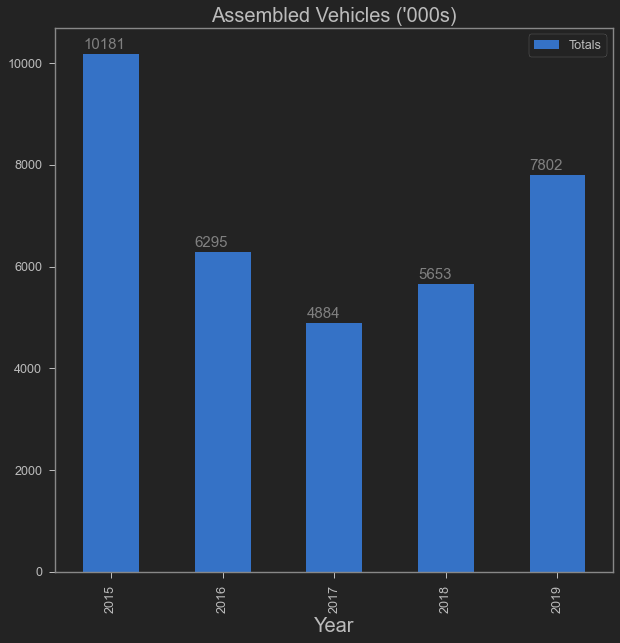

In [3]:
plot = df_assembled_veh.plot(kind='bar', x='Year', y='Totals', title='Assembled Vehicles (\'000s)', figsize=(10,10))
plot.set_xlabel('Year', fontsize=20)
plot.title.set_size(20)

# set individual bar lables using above list
for i in plot.patches:
    # get_width pulls left or right; get_y pushes up or down
    plot.text(i.get_x(), i.get_height()+100, i.get_height(), fontsize=15, color='grey')
plt.savefig('Easy Valuer Survey/Assembled Vehicles.png', bbox_inches="tight")

In [4]:
# read tables into list of dataframes
df1 = tabula.read_pdf("Easy Valuer Survey/Leading Economic Indicator March 2020.pdf", pages=49)

# drop columns and rows
df_1 = df1[0].drop(columns='2018', axis=1)
df_1 = df_1[[c for c in df_1 if c not in ['2019']] + [c for c in ['2019'] if c in df_1]]

df_1.drop(df_1.index[0], inplace=True)
df_1.reset_index(drop=True, inplace=True)
df_1.columns = ['Body Type', 'Jan', 'Feb', 'Mar', 'Apr', 'May', 'Jun', 'Jul', 'Aug', 'Sep', 'Oct', 'Nov', 'Dec', '2019']

#Edit column values and convert to integer
df_1.drop(columns="2019", axis=1, inplace=True)
df_1['Body Type'] = df_1['Body Type'].str.replace('.','')
for i in df_1.columns:
    if i != 'Body Type':
         df_1[i] = df_1[i].str.replace(',','').astype('int64')
    else:
         df_1[i] = df_1[i].str.replace(',','')

# find sum of columns
df_1['2019'] = df_1.sum(axis=1)
df_1 = df_1[['Body Type', '2019']].copy()

df_1

,Body Type,2019
0,Saloons,10144
1,Station Wagons,73421
2,Vans,5595
3,Pick Ups,4924
4,Mini Buses,1865
5,Buses,1333
6,Lorries,6520
7,Trailers,1611
8,Motor Cycles,209661
9,Three Wheelers,7326


In [5]:
df2 = tabula.read_pdf("Easy Valuer Survey/LEI032019.pdf", pages=54)


dfObj = pd.DataFrame(columns=['Body Type', 'Nov17', 'Dec17', '2017', 'Jan', 'Feb', 'Mar', 'Apr', 'May', 'Jun', 'Jul', 'Aug',\
                              'Sep', 'Oct', 'Nov', 'Dec'])

data = []
for i in df2[0].columns:
    data.append(i)

dfObj = dfObj.append({'Body Type': data[0], 'Nov17': data[1], 'Dec17': data[2], '2017': data[3], 'Jan': data[4], 'Feb': data[5], \
                      'Mar': data[6], 'Apr': data[7], 'May': data[8], 'Jun': data[9], 'Jul': data[10], 'Aug': data[11],\
                        'Sep': data[12], 'Oct': data[13], 'Nov': data[14], 'Dec': data[15]}, ignore_index=True)

df2[0].columns = ['Body Type', 'Nov17', 'Dec17', '2017', 'Jan', 'Feb', 'Mar', 'Apr', 'May', 'Jun', 'Jul', 'Aug', 'Sep', \
               'Oct', 'Nov', 'Dec']

df_2 = pd.concat([dfObj, df2[0]])
df_2.reset_index(drop=True, inplace=True)
df_2.drop(['Nov17', 'Dec17'], axis=1, inplace=True)

df_2['Body Type'] = df_2['Body Type'].str.replace('.','')
for i in df_2.columns:
    if i != 'Body Type' and i != 'Feb':
        df_2[i] = df_2[i].str.replace(',','').astype('int64')
    else:
         df_2[i] = df_2[i].str.replace(',','')

df_3 = df_2[['Body Type', '2017']].copy()
df_2.pop('2017')

# replace Nan value Feb;Mini Buses with mean
df_2.loc[4, 'Feb'] = str(int(df_2.mean(axis=1, numeric_only=True)[4]))
df_2['Feb'] = df_2['Feb'].str.replace(',','').astype('int64')

# sum of rows
df_2['2018'] = df_2.sum(axis=1)
df_2 = df_2[['Body Type', '2018']].copy()

df_2

,Body Type,2018
0,Saloons,9838
1,Station Wagons,61816
2,Vans,5242
3,Pick Ups,5939
4,Mini Buses,665
5,Buses,1099
6,Lorries,8494
7,Trailers,2013
8,Motor Cycles,191751
9,Three Wheelers,6506


In [6]:
df_3

,Body Type,2017
0,Saloons,11376
1,Station Wagons,55322
2,Vans,5484
3,Pick Ups,4382
4,Mini Buses,459
5,Buses,1072
6,Lorries,7460
7,Trailers,1953
8,Motor Cycles,186434
9,Three Wheelers,5167


In [7]:
df4 = tabula.read_pdf("Easy Valuer Survey/LEI052017.pdf", pages=51)
df_4 = df4[0].drop(['Unnamed: 12', '2017*', 'Unnamed: 13', 'Unnamed: 14', 'Unnamed: 15'], axis=1)

df_4.drop(df_4.index[0], inplace=True)
df_4.reset_index(drop=True, inplace=True)
df_4.columns = ['Body Type', 'Jan', 'Feb', 'Mar', 'Apr', 'May', 'Jun', 'Jul', 'Aug', 'Sep', 'Oct', 'Nov', 'Dec']

df_4['Body Type'] = df_4['Body Type'].str.replace('.','')
for i in df_4.columns:
    if i != 'Body Type':
        df_4[i] = df_4[i].str.replace(',','')
        df_4[i] = df_4[i].str.replace(' ','').astype('int64')
    else:
         df_4[i] = df_4[i].str.replace(',','')
    
# find sum of columns
df_4['2016'] = df_4.sum(axis=1)
df_4 = df_4[['Body Type', '2016']].copy()

df_4

,Body Type,2016
0,Saloons,12490
1,Station Wagon,46123
2,Vans Pick- ups Etc,12722
3,M/Buses,519
4,Buses,1765
5,Lorries,9632
6,Trailers,2829
7,Motors Cycles,119724
8,3 Wheelers,3815
9,Wheeled tractors,2478


In [8]:
df5 = tabula.read_pdf("Easy Valuer Survey/lei052016.pdf", pages=62)
df_5 = df5[0][['Type/Month', 'Total.1']].copy()

#rename columns, edit columns
df_5.columns = ['Body Type', '2015']
df_5['2015'] = df_5['2015'].str.replace(',','').astype('int64')

df_5

,Body Type,2015
0,Saloons,14369
1,Station Wagon,54120
2,"Vans, Pick- ups. Etc",13878
3,M/Buses,581
4,Buses,2342
5,Lorries,13785
6,Trailers,3905
7,Motors Cycles,134645
8,3 Wheelers,4775
9,Wheeled tractors,2259


In [9]:
df_reg_veh1 = pd.concat([df_5, df_4[['2016']].copy()], axis=1, sort=True)
df_reg_veh1 = pd.concat([df_reg_veh1[:3], pd.DataFrame({'Body Type': ['Pick Ups'], '2015': ['-'], '2016': ['-']}),\
                         df_reg_veh1[3:]])

df_reg_veh1.reset_index(drop=True, inplace=True)

df_reg_veh2 = pd.concat([df_3, df_2[['2018']].copy(), df_1[['2019']].copy()], axis=1, sort=True)

df_reg_veh1['Body Type'] = df_reg_veh2['Body Type']

df_reg_v = pd.concat([df_reg_veh1, df_reg_veh2[['2017', '2018', '2019']].copy()], axis=1)

df_reg_v

,Body Type,2015,2016,2017,2018,2019
0,Saloons,14369,12490,11376,9838,10144
1,Station Wagons,54120,46123,55322,61816,73421
2,Vans,13878,12722,5484,5242,5595
3,Pick Ups,-,-,4382,5939,4924
4,Mini Buses,581,519,459,665,1865
5,Buses,2342,1765,1072,1099,1333
6,Lorries,13785,9632,7460,8494,6520
7,Trailers,3905,2829,1953,2013,1611
8,Motor Cycles,134645,119724,186434,191751,209661
9,Three Wheelers,4775,3815,5167,6506,7326


In [10]:
vn = ['Vans and Pick Ups', df_reg_v.loc[2, '2015'], df_reg_v.loc[2, '2016'], \
                     df_reg_v.loc[2, '2017']+df_reg_v.loc[3, '2017'],  \
                     df_reg_v.loc[2, '2018']+df_reg_v.loc[3, '2018'], \
                     df_reg_v.loc[2, '2019']+df_reg_v.loc[3, '2019']]

df_reg_veh = df_reg_v.drop(3)
df_reg_veh.loc[2] = vn
df_reg_veh.reset_index(drop=True, inplace=True)

df_reg_veh['2015'] = df_reg_veh['2015'].astype('int64')
df_reg_veh['2016'] = df_reg_veh['2016'].astype('int64')

df_reg_veh['Totals'] = df_reg_veh.sum(axis=1)

df_reg_veh

,Body Type,2015,2016,2017,2018,2019,Totals
0,Saloons,14369,12490,11376,9838,10144,58217
1,Station Wagons,54120,46123,55322,61816,73421,290802
2,Vans and Pick Ups,13878,12722,9866,11181,10519,58166
3,Mini Buses,581,519,459,665,1865,4089
4,Buses,2342,1765,1072,1099,1333,7611
5,Lorries,13785,9632,7460,8494,6520,45891
6,Trailers,3905,2829,1953,2013,1611,12311
7,Motor Cycles,134645,119724,186434,191751,209661,842215
8,Three Wheelers,4775,3815,5167,6506,7326,27589
9,Wheeled Tractors,2259,2478,2703,2654,1829,11923


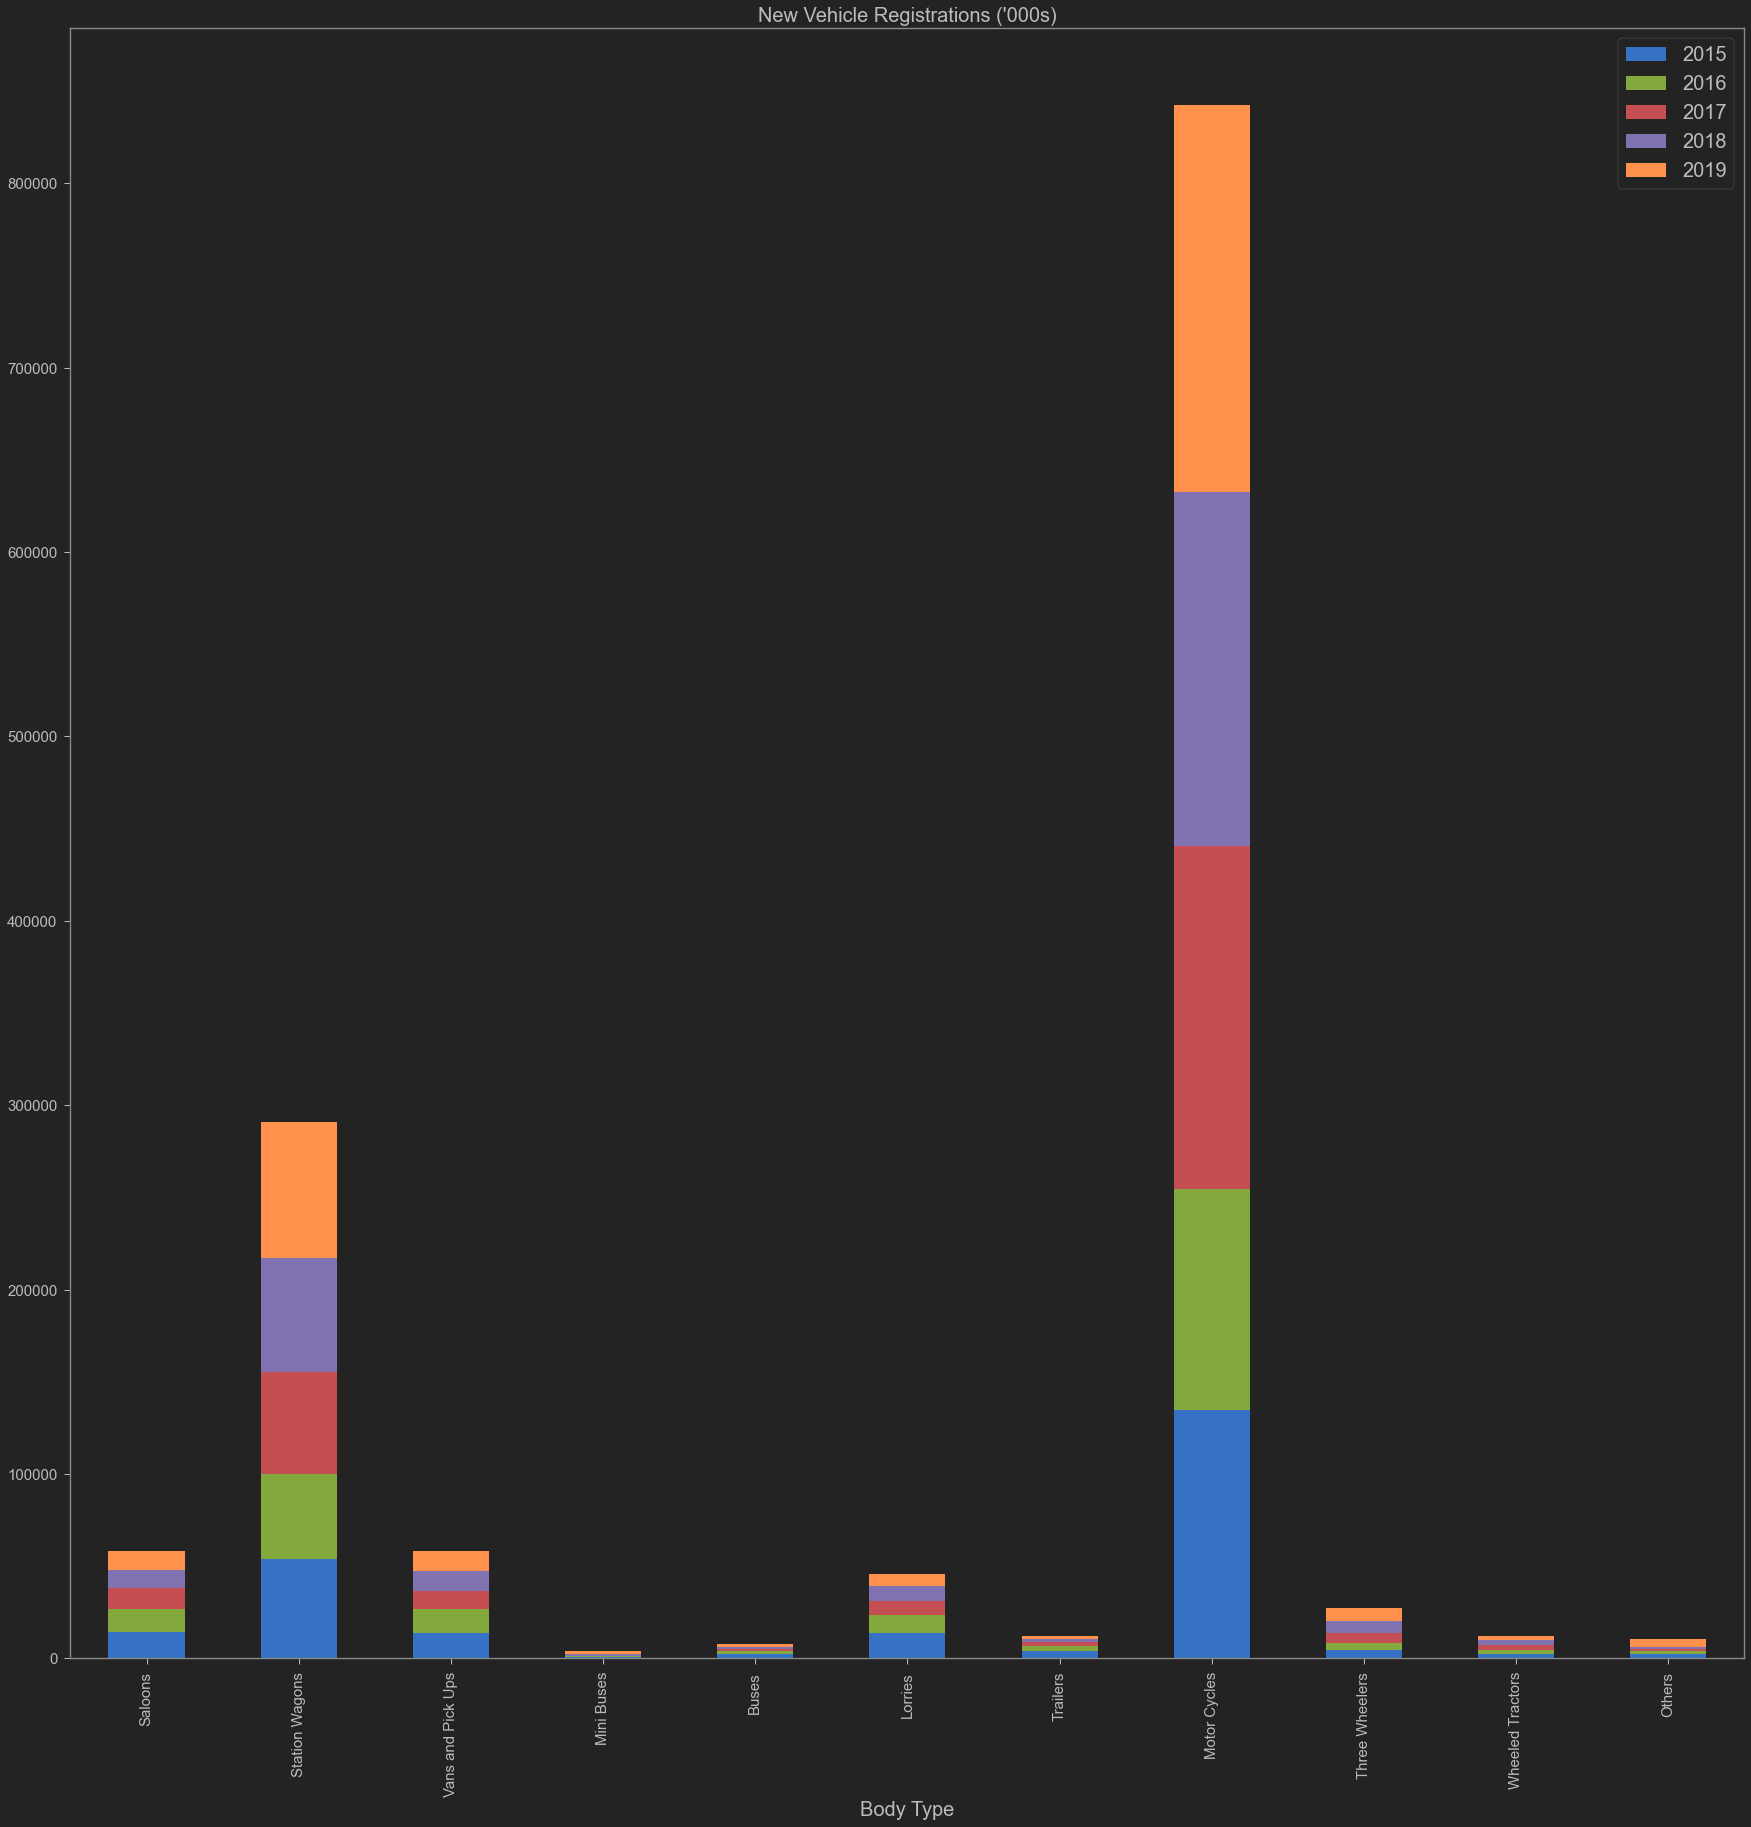

In [11]:
plot = df_reg_veh.drop(11).plot(kind='bar', x='Body Type', y=['2015', '2016', '2017', '2018', '2019'], \
                                title='New Vehicle Registrations (\'000s)', fontsize=15, \
                                figsize=(30,30), stacked=True)

plot.set_xlabel('Body Type', fontsize=20)
plot.title.set_size(20)
plot.legend(fontsize=20)
'''
for i in plot.patches:
    # get_width pulls left or right; get_y pushes up or down    
    plot.text(i.get_x()+i.get_width(), i.get_y()+i.get_height()/2, int(i.get_height()), fontsize=15, color='grey')'''
    
plt.savefig('Easy Valuer Survey/New Vehicle Registration.png', bbox_inches="tight")

In [12]:

'''
count = hght = 0
j = 0
for i in plot.patches:
    # get_width pulls left or right; get_y pushes up or down    
    plot.text(i.get_x()+i.get_width(), i.get_y()+i.get_height()/2, int(i.get_height()), fontsize=15, color='grey')
            
    count += 1
    hght += i.get_height()
    
    if(count == 5):
        plot.text(i.get_x(), i.get_y()+i.get_height(), df_reg_veh.loc[j, 'Totals'], fontsize=18, color='yellow')
        count = 0
        hght = 0
        j +=1
'''  

"\ncount = hght = 0\nj = 0\nfor i in plot.patches:\n    # get_width pulls left or right; get_y pushes up or down    \n    plot.text(i.get_x()+i.get_width(), i.get_y()+i.get_height()/2, int(i.get_height()), fontsize=15, color='grey')\n            \n    count += 1\n    hght += i.get_height()\n    \n    if(count == 5):\n        plot.text(i.get_x(), i.get_y()+i.get_height(), df_reg_veh.loc[j, 'Totals'], fontsize=18, color='yellow')\n        count = 0\n        hght = 0\n        j +=1\n"

In [13]:
df_ins = pd.DataFrame(columns=['Year', 'Gross Direct Premium Income Private', 'Gross Direct Premium Income Commercial', \
                               'Claims Value Private','Claims Value Commercial', 'Underwriting Results Private', 'Underwriting Results Commercial'])
df_ins = df_ins.append({'Year': '2015', 'Gross Direct Premium Income Private': '18,465,581', \
                        'Gross Direct Premium Income Commercial': '24,957,570'}, ignore_index=True)
df_ins = df_ins.append({'Year': '2016', 'Gross Direct Premium Income Private': '19,205,813', \
                        'Gross Direct Premium Income Commercial': '24,488,692'}, ignore_index=True)
df_ins = df_ins.append({'Year': '2017', 'Gross Direct Premium Income Private': '21,054,114', \
                        'Gross Direct Premium Income Commercial': '22,725,753'}, ignore_index=True)
df_ins = df_ins.append({'Year': '2018', 'Gross Direct Premium Income Private': '22,625,802', \
                        'Gross Direct Premium Income Commercial': '23,642,126'}, ignore_index=True)
df_ins = df_ins.append({'Year': '2019', 'Gross Direct Premium Income Private': '23,367,707', \
                        'Gross Direct Premium Income Commercial': '22,178,506'}, ignore_index=True)

df6 = tabula.read_pdf("Easy Valuer Survey/Insurance-Industry-Annual-Report-2018.pdf", pages=61)

df_ins.loc[0, 'Claims Value Private'] = df6[0].loc[8, 'Unnamed: 2']
df_ins.loc[0, 'Claims Value Commercial'] = df6[0].loc[9, 'Unnamed: 2']
df_ins.loc[1, 'Claims Value Private'] = df6[0].loc[8, 'Years']
df_ins.loc[1, 'Claims Value Commercial'] = df6[0].loc[9, 'Years']
df_ins.loc[2, 'Claims Value Private'] = df6[0].loc[8, 'Unnamed: 3']
df_ins.loc[2, 'Claims Value Commercial'] = df6[0].loc[9, 'Unnamed: 3']
df_ins.loc[3, 'Claims Value Private'] = df6[0].loc[8, 'Unnamed: 4']
df_ins.loc[3, 'Claims Value Commercial'] = df6[0].loc[9, 'Unnamed: 4']
df_ins.loc[4, 'Claims Value Private'] = '17,052,949'
df_ins.loc[4, 'Claims Value Commercial'] = '13,515,670'

df7 = tabula.read_pdf("Easy Valuer Survey/Insurance-Industry-Annual-Report-2018.pdf", pages=65)

df_ins.loc[0, 'Underwriting Results Private'] = df7[0].loc[8, 'Unnamed: 2']
df_ins.loc[0, 'Underwriting Results Commercial'] = df7[0].loc[9, 'Unnamed: 2']
df_ins.loc[1, 'Underwriting Results Private'] = df7[0].loc[8, 'Years']
df_ins.loc[1, 'Underwriting Results Commercial'] = df7[0].loc[9, 'Years']
df_ins.loc[2, 'Underwriting Results Private'] = df7[0].loc[8, 'Unnamed: 3']
df_ins.loc[2, 'Underwriting Results Commercial'] = df7[0].loc[9, 'Unnamed: 3']
df_ins.loc[3, 'Underwriting Results Private'] = df7[0].loc[8, 'Unnamed: 4']
df_ins.loc[3, 'Underwriting Results Commercial'] = df7[0].loc[9, 'Unnamed: 4']
df_ins.loc[4, 'Underwriting Results Private'] = '(4,358,684)'
df_ins.loc[4, 'Underwriting Results Commercial'] = '(2,505,847)'

# convert to integers
for i in df_ins.columns:
    if i != 'Year':
        df_ins[i] = df_ins[i].str.replace(',','')
        df_ins[i] = df_ins[i].str.replace('(','')
        df_ins[i] = df_ins[i].str.replace(')','').astype('int64')
    else:
        None
        
# deal with negative values
df_ins['Underwriting Results Private'] = df_ins['Underwriting Results Private']*-1
df_ins.loc[3, 'Underwriting Results Commercial'] = df_ins.loc[3, 'Underwriting Results Commercial']*-1
df_ins.loc[4, 'Underwriting Results Commercial'] = df_ins.loc[4, 'Underwriting Results Commercial']*-1

df_ins

,Year,Gross Direct Premium Income Private,Gross Direct Premium Income Commercial,Claims Value Private,Claims Value Commercial,Underwriting Results Private,Underwriting Results Commercial
0,2015,18465581,24957570,12887219,12924772,-3101547,725825
1,2016,19205813,24488692,14968463,12750248,-3291817,820711
2,2017,21054114,22725753,14181895,12646816,-2930081,933287
3,2018,22625802,23642126,14301162,13618583,-2578206,-873562
4,2019,23367707,22178506,17052949,13515670,-4358684,-2505847


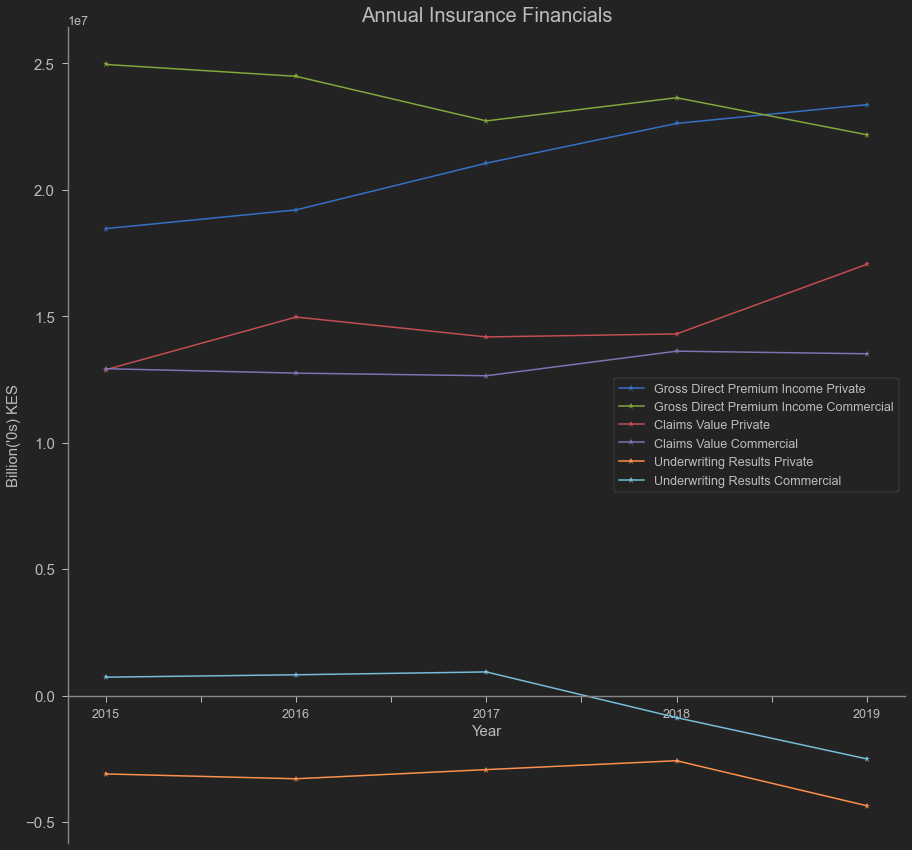

In [20]:
plot = df_ins.plot(x='Year', y=['Gross Direct Premium Income Private', 'Gross Direct Premium Income Commercial', \
                                'Claims Value Private','Claims Value Commercial', 'Underwriting Results Private', \
                                'Underwriting Results Commercial'], figsize=(15,15), fontsize=15, \
                   marker='*', title='Annual Insurance Financials')

#plot.set_xticks(range(len(xaxis)), xaxis)
plot.set_xlabel('Year', fontsize=15)
plot.set_ylabel('Billion(\'0s) KES', fontsize=15)
plot.title.set_size(20)

# set axis intersection
#plot.spines['left'].set_position(('data', 0))
plot.spines['bottom'].set_position(('data', 1))
plot.spines['top'].set_visible(False)
plot.spines['right'].set_visible(False)
plt.legend(loc='right')

plt.savefig('Easy Valuer Survey/Annual Insurance Financials.png', bbox_inches="tight")

In [21]:
df8 = tabula.read_pdf("Easy Valuer Survey/Quarter-4-2019--Industry-Release-10032020.pdf", pages=55)
df8[0].columns = df8[0].loc[0]
df8[0].drop([0,1,39,40,41,42,43,44,45,46], inplace=True)
df8[0].reset_index(drop=True, inplace=True)

df8[0][30:]

df_8 = df8[0][['Company', 'Motor Private', 'Motor Commercial', 'Motor Commercial\rPSV']].copy()

for i in df_8.columns:
    if i != 'Company':
        df_8[i] = df_8[i].str.replace(',','')
        df_8[i] = df_8[i].str.replace('-','0').astype('int64')
    else:
        None

df_8.columns = ['Company', 'Motor Private GPI', 'Motor Commercial GPI', 'Motor Commercial PSV GPI']

df_8['Total GPI'] = df_8.sum(axis=1)

df_8.tail()

,Company,Motor Private GPI,Motor Commercial GPI,Motor Commercial PSV GPI,Total GPI
32,THE KENYAN ALLIANCE INSURANCE,573230,397769,0,970999
33,THE MONARCH INSURANCE,552771,525589,0,1078360
34,TRIDENT INSURANCE COMPANY,437582,194466,42034,674082
35,UAP INSURANCE COMPANY,1072640,893196,0,1965836
36,XPLICO INSURANCE COMPANY,337282,92649,1002088,1432019


In [22]:
df9 = tabula.read_pdf("Easy Valuer Survey/Quarter-4-2019--Industry-Release-10032020.pdf", pages=58)
df9[0].columns = df9[0].loc[0]
df9[0].drop([0,1,39,40,41,42,43,44,45,46], inplace=True)
df9[0].reset_index(drop=True, inplace=True)

df9[0].head()

df_9 = df9[0][['Company', 'Motor Private', 'Motor\rCommercial', 'Motor\rCommercial PSV']].copy()

for i in df_9.columns:
    if i != 'Company':
        df_9[i] = df_9[i].str.replace(',','')
        df_9[i] = df_9[i].str.replace('-','0')
        df_9[i] = df_9[i].str.replace('(','')
        df_9[i] = df_9[i].str.replace(')','').astype('int64')
    else:
        None

df_9.columns = ['Company', 'Motor Private Claims', 'Motor Commercial Claims', 'Motor Commercial PSV Claims']
df_9.loc[1, 'Motor Commercial PSV Claims'] = df_9.loc[1, 'Motor Commercial PSV Claims']*-1

df_9['Total Claims'] = df_9.sum(axis=1)

df_9.tail()

,Company,Motor Private Claims,Motor Commercial Claims,Motor Commercial PSV Claims,Total Claims
32,THE KENYAN ALLIANCE INSURANCE,416176,177673,0,593849
33,THE MONARCH INSURANCE,330917,280787,0,611704
34,TRIDENT INSURANCE COMPANY,157904,123127,51932,332963
35,UAP INSURANCE COMPANY,913387,501603,0,1414990
36,XPLICO INSURANCE COMPANY,157404,134449,338873,630726


In [23]:
df10 = tabula.read_pdf("Easy Valuer Survey/Quarter-4-2019--Industry-Release-10032020.pdf", pages=60)
df10[0].columns = df10[0].loc[0]
df10[0].drop([0,1,39,40,41,42,43,44,45,46], inplace=True)
df10[0].reset_index(drop=True, inplace=True)

df_10 = df10[0][['Company', 'Motor Private', 'Motor\rCommercial', 'Motor\rCommercial PSV']].copy()

for i in df_10.columns:
    if i != 'Company':
        df_10[i] = df_10[i].str.replace(',','')
        df_10[i] = df_10[i].str.replace('-','0')
    else:
        None

df_10.columns = ['Company', 'Motor Private Underwriting', 'Motor Commercial Underwriting', 'Motor Commercial PSV Underwriting']

j = 0
def negate(data, columns):
    for i in columns:
        j = 0
        for k in data[i]:
            if '(' in k:
                k = k.replace(')','')
                data.loc[j, i] = int(k.replace('(',''))*-1
            else:
                data.loc[j, i] = int(k)

            j +=1
    return data


df_10 = negate(df_10, ['Motor Private Underwriting', 'Motor Commercial Underwriting', 'Motor Commercial PSV Underwriting']) 

df_10['Total Underwriting'] = df_10.drop('Company', axis=1).astype('float').sum(axis=1)

df_10.head()

,Company,Motor Private Underwriting,Motor Commercial Underwriting,Motor Commercial PSV Underwriting,Total Underwriting
0,AAR INSURANCE KENYA,0,0,0,0.0
1,AFRICAN MERCHANT ASSURANCE,-64416,-233795,5678,-292533.0
2,AIG INSURANCE COMPANY,77979,-86000,0,-8021.0
3,ALLIANZ INSURANCE COMPANY,-44324,22205,0,-22119.0
4,APA INSURANCE COMPANY,-316525,-120188,0,-436713.0


In [24]:
# create new dataframe with all columns
df_insurers_019 = pd.concat([df_8[['Company', 'Motor Private GPI']].copy(), df_9[['Motor Private Claims']].copy(), \
                         df_10[['Motor Private Underwriting']].copy(), \
                         df_8[['Motor Commercial GPI']].copy(), df_9[['Motor Commercial Claims']].copy(), \
                         df_10[['Motor Commercial Underwriting']].copy(), \
                         df_8[['Motor Commercial PSV GPI']].copy(), df_9[['Motor Commercial PSV Claims']].copy(), \
                         df_10[['Motor Commercial PSV Underwriting']].copy(), \
                         df_8[['Total GPI']].copy(), df_9[['Total Claims']].copy(), \
                         df_10[['Total Underwriting']].copy()] ,axis=1)

df_insurers_019.head()

,Company,Motor Private GPI,Motor Private Claims,Motor Private Underwriting,Motor Commercial GPI,Motor Commercial Claims,Motor Commercial Underwriting,Motor Commercial PSV GPI,Motor Commercial PSV Claims,Motor Commercial PSV Underwriting,Total GPI,Total Claims,Total Underwriting
0,AAR INSURANCE KENYA,0,0,0,0,0,0,0,0,0,0,0,0.0
1,AFRICAN MERCHANT ASSURANCE,602418,336545,-64416,405833,322355,-233795,0,-5678,5678,1008251,653222,-292533.0
2,AIG INSURANCE COMPANY,887575,117647,77979,184125,126240,-86000,0,0,0,1071700,243887,-8021.0
3,ALLIANZ INSURANCE COMPANY,177191,120565,-44324,151804,43129,22205,0,0,0,328995,163694,-22119.0
4,APA INSURANCE COMPANY,1516307,1270412,-316525,1483579,1055283,-120188,0,0,0,2999886,2325695,-436713.0


In [25]:
df_sort_insurers_019 = df_insurers_019.sort_values(by=['Total GPI'], ascending=False, ignore_index=True)
df_sort_insurers_019[:10]

,Company,Motor Private GPI,Motor Private Claims,Motor Private Underwriting,Motor Commercial GPI,Motor Commercial Claims,Motor Commercial Underwriting,Motor Commercial PSV GPI,Motor Commercial PSV Claims,Motor Commercial PSV Underwriting,Total GPI,Total Claims,Total Underwriting
0,CIC GENERAL INSURANCE COMPANY,2187823,1775092,-384578,2115011,1299808,-74348,0,0,0,4302834,3074900,-458926.0
1,GEMINIA INSURANCE COMPANY,1462261,1758014,-337735,1645412,960460,-476537,0,0,21373,3107673,2718474,-792899.0
2,APA INSURANCE COMPANY,1516307,1270412,-316525,1483579,1055283,-120188,0,0,0,2999886,2325695,-436713.0
3,BRITAM GENERAL INSURANCE,1435506,1197233,-679082,1071367,898138,-495543,0,0,0,2506873,2095371,-1174625.0
4,DIRECTLINE ASSURANCE COMPANY,127277,131877,-6382,41657,42807,-1219,2259196,1000180,-89692,2428130,1174864,-97293.0
5,JUBILEE INSURANCE COMPANY,1356225,1263856,-577935,687652,647394,-299796,0,0,0,2043877,1911250,-877731.0
6,UAP INSURANCE COMPANY,1072640,913387,-153284,893196,501603,94169,0,0,0,1965836,1414990,-59115.0
7,ICEA LION GENERAL INSURANCE,1227281,706650,-161752,564425,196988,23674,0,0,0,1791706,903638,-138078.0
8,HERITAGE INSURANCE COMPANY,887818,483869,-45259,604621,324187,12493,57692,4009,49434,1550131,812065,16668.0
9,OCCIDENTAL INSURANCE COMPANY,791525,528705,-26315,757881,481796,-10046,0,0,0,1549406,1010501,-36361.0


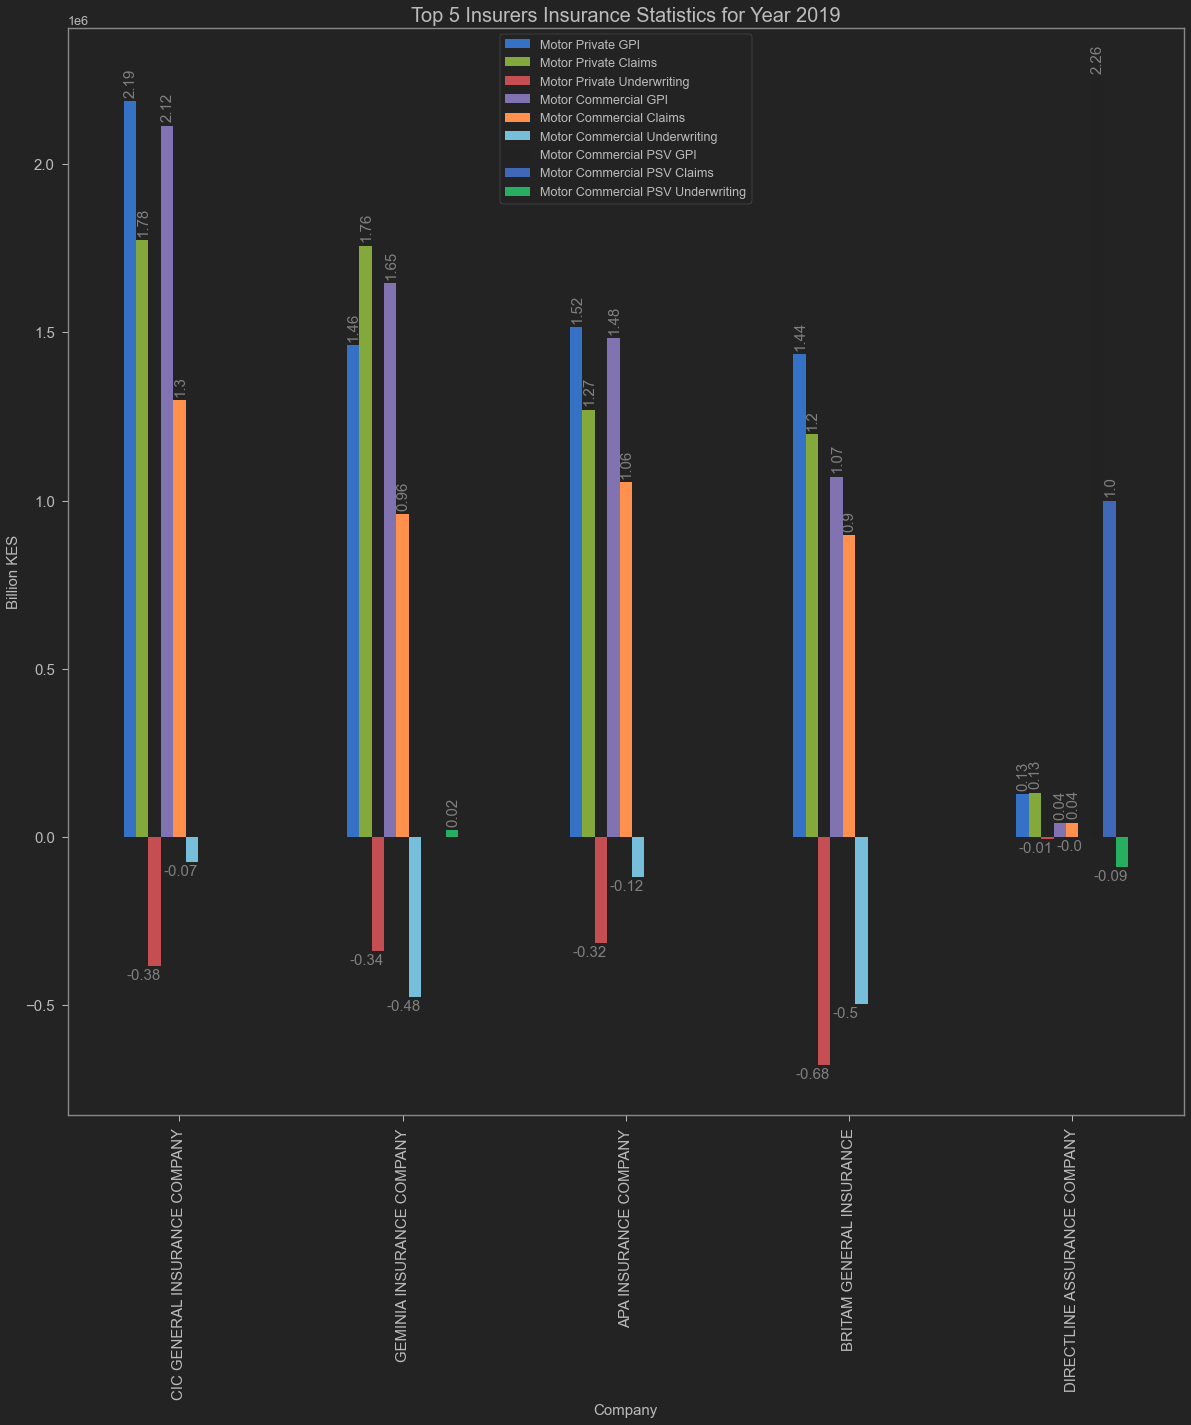

In [34]:
l = list(df_sort_insurers_019.columns)
l.remove('Company')
del l[9:12]

plot = df_sort_insurers_019[:5].plot(kind='bar', x='Company', y=l, fontsize=15, figsize=(20,20), \
                                 title='Top 5 Insurers Insurance Statistics for Year 2019')

plot.legend(loc='upper center')
plot.set_xlabel('Company', fontsize=15)
plot.set_ylabel('Billion KES', fontsize=15)
plot.title.set_size(20)


for i in plot.patches:
    # get_width pulls left or right; get_y pushes up or down
    hght = i.get_height()
    if hght>0:
        plot.text(i.get_x(), i.get_height()+20000, round(i.get_height()/pow(10,6),2), fontsize=15, color='grey', rotation=90)
    elif hght<0:
        plot.text(i.get_x()-0.1, i.get_height()-40000, round(i.get_height()/pow(10,6),2), fontsize=15, color='grey')

plt.savefig('Easy Valuer Survey/Top 5 Insurers Insurance Statistics for Year 2019.png', bbox_inches="tight")

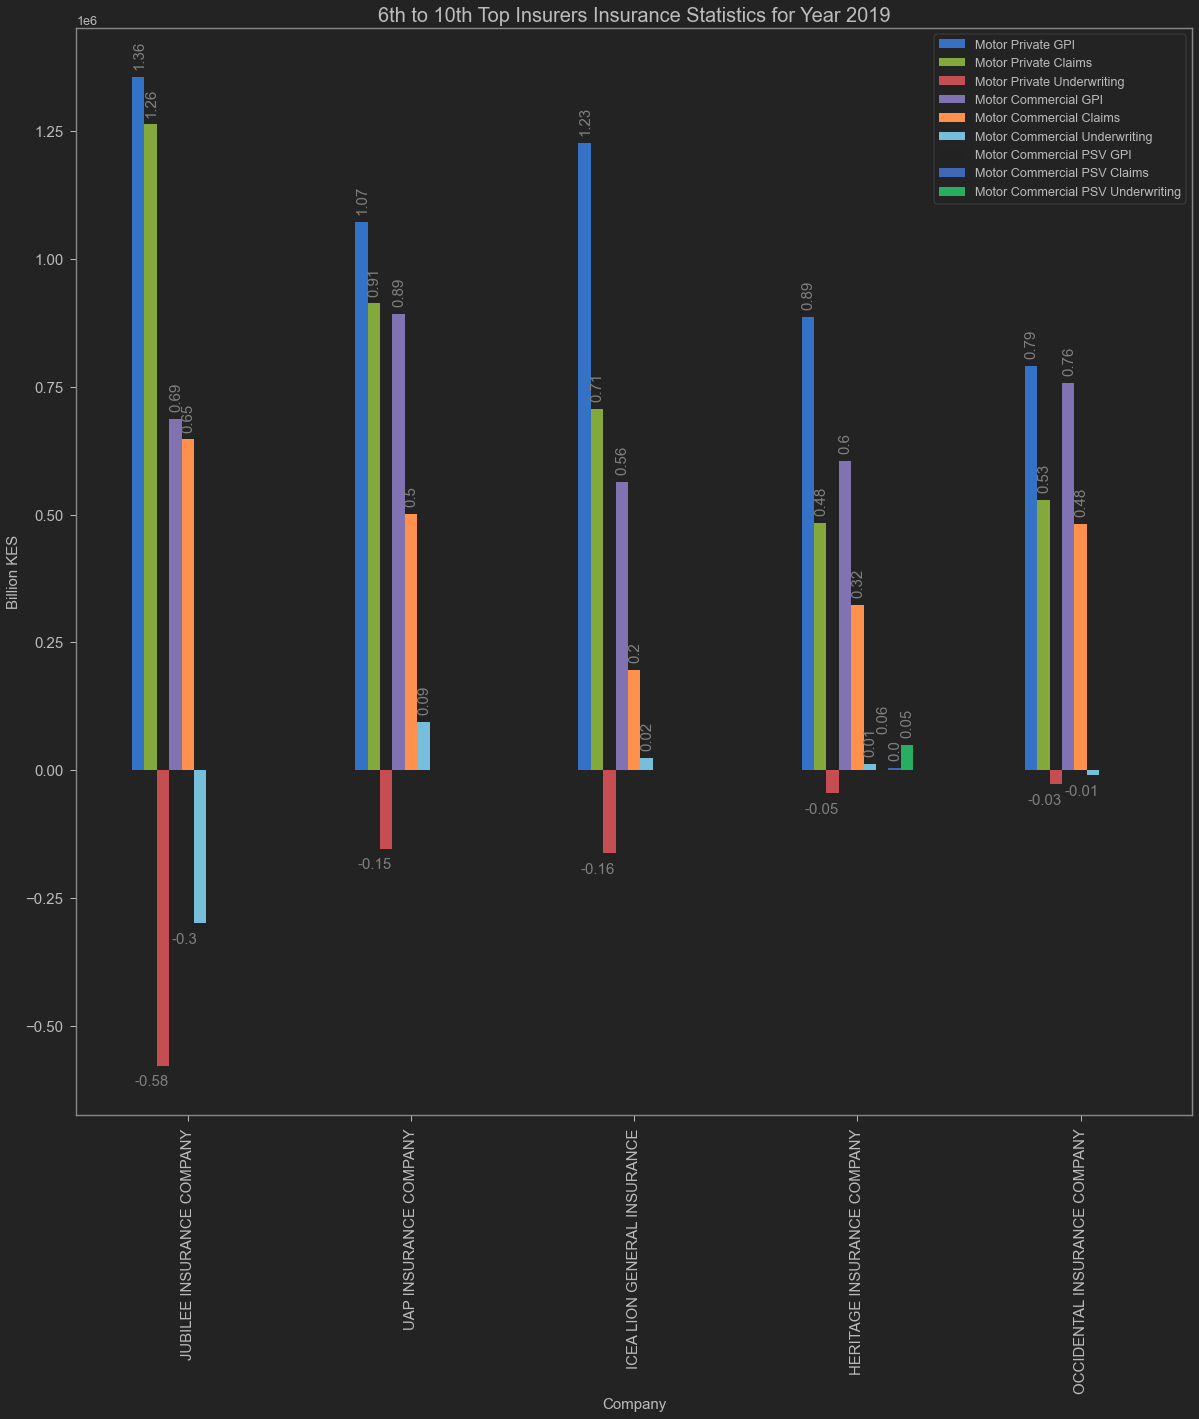

In [27]:
plot = df_sort_insurers_019[5:10].plot(kind='bar', x='Company', y=l, fontsize=15, figsize=(20,20), \
                                   title='6th to 10th Top Insurers Insurance Statistics for Year 2019')

#plot.legend(loc='upper center')
plot.set_xlabel('Company', fontsize=15)
plot.set_ylabel('Billion KES', fontsize=15)
plot.title.set_size(20)


for i in plot.patches:
    # get_width pulls left or right; get_y pushes up or down
    hght = i.get_height()
    if hght>0:
        plot.text(i.get_x(), i.get_height()+20000, round(i.get_height()/pow(10,6),2), fontsize=15, color='grey', rotation=90)
    elif hght<0:
        plot.text(i.get_x()-0.1, i.get_height()-40000, round(i.get_height()/pow(10,6),2), fontsize=15, color='grey')

plt.savefig('Easy Valuer Survey/6th to 10th Top Insurers Insurance Statistics for Year 2019.png', bbox_inches="tight")

In [35]:
df11 = tabula.read_pdf("Easy Valuer Survey/Q4-2018--Industry-Release.pdf", pages=52)
df11[0].columns = df11[0].loc[0]
df11[0].drop([0,1,39,40,41,42,43,44,45], inplace=True)
df11[0].reset_index(drop=True, inplace=True)

df11[0]

df_11 = df11[0][['Company', 'Motor Private', 'Motor Commercial', 'Motor Commercial\rPSV']].copy()

for i in df_11.columns:
    if i != 'Company':
        df_11[i] = df_11[i].str.replace(',','')
        df_11[i] = df_11[i].str.replace('-','0').astype('int64')
    else:
        None

df_11.columns = ['Company', 'Motor Private GPI', 'Motor Commercial GPI', 'Motor Commercial PSV GPI']

df_11['Total GPI'] = df_11.sum(axis=1)

df_11.tail()

,Company,Motor Private GPI,Motor Commercial GPI,Motor Commercial PSV GPI,Total GPI
32,THE KENYAN ALLIANCE INSURANCE,525442,362839,0,888281
33,THE MONARCH INSURANCE,646216,447059,0,1093275
34,TRIDENT INSURANCE COMPANY,184024,79822,25565,289411
35,UAP INSURANCE COMPANY,1225871,979954,0,2205825
36,XPLICO INSURANCE COMPANY,391334,223394,676300,1291028


In [36]:
df12 = tabula.read_pdf("Easy Valuer Survey/Q4-2018--Industry-Release.pdf", pages=55)
df12[0].columns = df12[0].loc[0]
df12[0].drop([0,1,39,40,41,42,43,44,45], inplace=True)
df12[0].reset_index(drop=True, inplace=True)

df12[0].head()

df_12 = df12[0][['Company', 'Motor Private', 'Motor\rCommercial', 'Motor\rCommercial PSV']].copy()

for i in df_12.columns:
    if i != 'Company':
        df_12[i] = df_12[i].str.replace(',','')
        df_12[i] = df_12[i].str.replace('-','0')
    else:
        None

df_12.columns = ['Company', 'Motor Private Claims', 'Motor Commercial Claims', 'Motor Commercial PSV Claims']

df_12 = negate(df_12, ['Motor Private Claims', 'Motor Commercial Claims', 'Motor Commercial PSV Claims']) 

df_12['Total Claims'] = df_12.sum(axis=1)

df_12.head()

,Company,Motor Private Claims,Motor Commercial Claims,Motor Commercial PSV Claims,Total Claims
0,AAR INSURANCE KENYA,0,0,0,0.0
1,AFRICAN MERCHANT ASSURANCE,182496,-134023,724638,0.0
2,AIG INSURANCE COMPANY,78638,19123,0,0.0
3,ALLIANZ INSURANCE COMPANY,65535,44930,0,0.0
4,APA INSURANCE COMPANY,978616,898593,0,0.0


In [37]:
df13 = tabula.read_pdf("Easy Valuer Survey/Q4-2018--Industry-Release.pdf", pages=57)
df13[0].columns = df13[0].loc[0]
df13[0].drop([0,1,39,40,41,42,43,44,45], inplace=True)
df13[0].reset_index(drop=True, inplace=True)

df_13 = df13[0][['Company', 'Motor Private', 'Motor\rCommercial', 'Motor\rCommercial PSV']].copy()

for i in df_13.columns:
    if i != 'Company':
        df_13[i] = df_13[i].str.replace(',','')
        df_13[i] = df_13[i].str.replace('-','0')
    else:
        None

df_13.columns = ['Company', 'Motor Private Underwriting', 'Motor Commercial Underwriting', 'Motor Commercial PSV Underwriting']

j = 0
def negate(data, columns):
    for i in columns:
        j = 0
        for k in data[i]:
            if '(' in k:
                k = k.replace(')','')
                data.loc[j, i] = int(k.replace('(',''))*-1
            else:
                data.loc[j, i] = int(k)

            j +=1
    return data


df_13 = negate(df_13, ['Motor Private Underwriting', 'Motor Commercial Underwriting', 'Motor Commercial PSV Underwriting']) 

df_13['Total Underwriting'] = df_10.drop('Company', axis=1).astype('float').sum(axis=1)

df_13.head()

,Company,Motor Private Underwriting,Motor Commercial Underwriting,Motor Commercial PSV Underwriting,Total Underwriting
0,AAR INSURANCE KENYA,0,0,0,0.0
1,AFRICAN MERCHANT ASSURANCE,319123,434573,-724638,-585066.0
2,AIG INSURANCE COMPANY,144652,32972,0,-16042.0
3,ALLIANZ INSURANCE COMPANY,-50606,-25151,0,-44238.0
4,APA INSURANCE COMPANY,-206409,-52202,0,-873426.0


In [38]:
# create new dataframe with all columns
df_insurers_018 = pd.concat([df_11[['Company', 'Motor Private GPI']].copy(), df_12[['Motor Private Claims']].copy(), \
                         df_13[['Motor Private Underwriting']].copy(), \
                         df_11[['Motor Commercial GPI']].copy(), df_12[['Motor Commercial Claims']].copy(), \
                         df_13[['Motor Commercial Underwriting']].copy(), \
                         df_11[['Motor Commercial PSV GPI']].copy(), df_12[['Motor Commercial PSV Claims']].copy(), \
                         df_13[['Motor Commercial PSV Underwriting']].copy(), \
                         df_11[['Total GPI']].copy(), df_12[['Total Claims']].copy(), \
                         df_13[['Total Underwriting']].copy()] ,axis=1)

df_insurers_018.head()

,Company,Motor Private GPI,Motor Private Claims,Motor Private Underwriting,Motor Commercial GPI,Motor Commercial Claims,Motor Commercial Underwriting,Motor Commercial PSV GPI,Motor Commercial PSV Claims,Motor Commercial PSV Underwriting,Total GPI,Total Claims,Total Underwriting
0,AAR INSURANCE KENYA,0,0,0,0,0,0,0,0,0,0,0.0,0.0
1,AFRICAN MERCHANT ASSURANCE,771838,182496,319123,595915,-134023,434573,0,724638,-724638,1367753,0.0,-585066.0
2,AIG INSURANCE COMPANY,929092,78638,144652,202110,19123,32972,0,0,0,1131202,0.0,-16042.0
3,ALLIANZ INSURANCE COMPANY,118977,65535,-50606,81583,44930,-25151,0,0,0,200560,0.0,-44238.0
4,APA INSURANCE COMPANY,1384567,978616,-206409,1511590,898593,-52202,0,0,0,2896157,0.0,-873426.0


In [39]:
df_sort_insurers_018 = df_insurers_018.sort_values(by=['Total GPI'], ascending=False, ignore_index=True)
df_sort_insurers_018[:10]

,Company,Motor Private GPI,Motor Private Claims,Motor Private Underwriting,Motor Commercial GPI,Motor Commercial Claims,Motor Commercial Underwriting,Motor Commercial PSV GPI,Motor Commercial PSV Claims,Motor Commercial PSV Underwriting,Total GPI,Total Claims,Total Underwriting
0,CIC GENERAL INSURANCE COMPANY,2329735,1787350,-231305,2410848,1470770,70757,0,0,0,4740583,0.0,-917852.0
1,DIRECTLINE ASSURANCE COMPANY,198989,135048,25205,58308,41732,4458,2745387,1796421,-335939,3002684,0.0,-194586.0
2,APA INSURANCE COMPANY,1384567,978616,-206409,1511590,898593,-52202,0,0,0,2896157,0.0,-873426.0
3,GEMINIA INSURANCE COMPANY,1276218,1032501,-199471,1407942,790194,38249,0,0,0,2684160,0.0,-1585798.0
4,BRITAM GENERAL INSURANCE,1348105,950187,-412953,1216185,647844,-184630,0,0,0,2564290,0.0,-2349250.0
5,UAP INSURANCE COMPANY,1225871,1047819,-372912,979954,572138,-8441,0,0,0,2205825,0.0,-118230.0
6,JUBILEE INSURANCE COMPANY,1241660,898403,-135635,677179,373950,68870,0,0,0,1918839,0.0,-1755462.0
7,MADISON INSURANCE COMPANY,744406,657837,-283521,766313,395372,115799,123381,151382,-147235,1634100,0.0,73996.0
8,ICEA LION GENERAL INSURANCE,1034702,593747,-53184,495166,291275,-19901,0,0,0,1529868,0.0,-276156.0
9,INVESCO ASSURANCE COMPANY,171234,63874,2749,67496,45050,-12196,1289059,817085,-180484,1527789,0.0,0.0


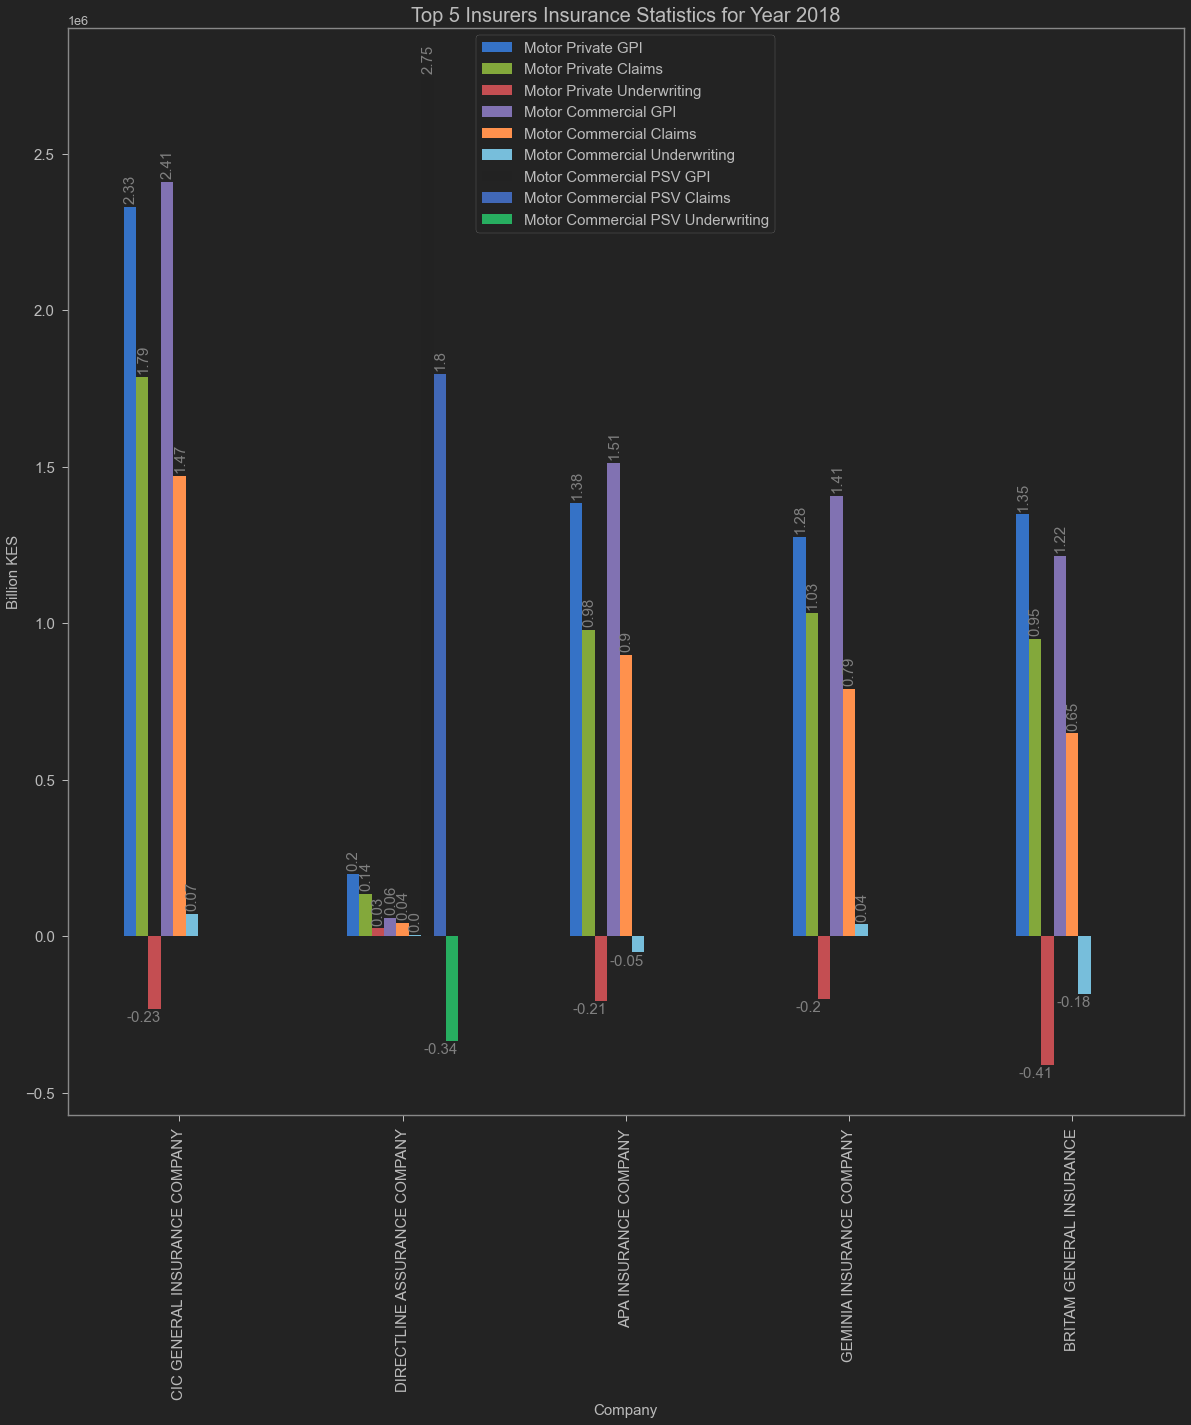

In [40]:
l = list(df_sort_insurers_018.columns)
l.remove('Company')
del l[9:12]

plot = df_sort_insurers_018[:5].plot(kind='bar', x='Company', y=l, fontsize=15, figsize=(20,20), \
                                 title='Top 5 Insurers Insurance Statistics for Year 2018')

plot.legend(loc='upper center', fontsize=15)
plot.set_xlabel('Company', fontsize=15)
plot.set_ylabel('Billion KES', fontsize=15)
plot.title.set_size(20)


for i in plot.patches:
    # get_width pulls left or right; get_y pushes up or down
    hght = i.get_height()
    if hght>0:
        plot.text(i.get_x(), i.get_height()+20000, round(i.get_height()/pow(10,6),2), fontsize=15, color='grey', rotation=90)
    elif hght<0:
        plot.text(i.get_x()-0.1, i.get_height()-40000, round(i.get_height()/pow(10,6),2), fontsize=15, color='grey')
        
plt.savefig('Easy Valuer Survey/Top 5 Insurers Insurance Statistics for Year 2018.png', bbox_inches="tight")

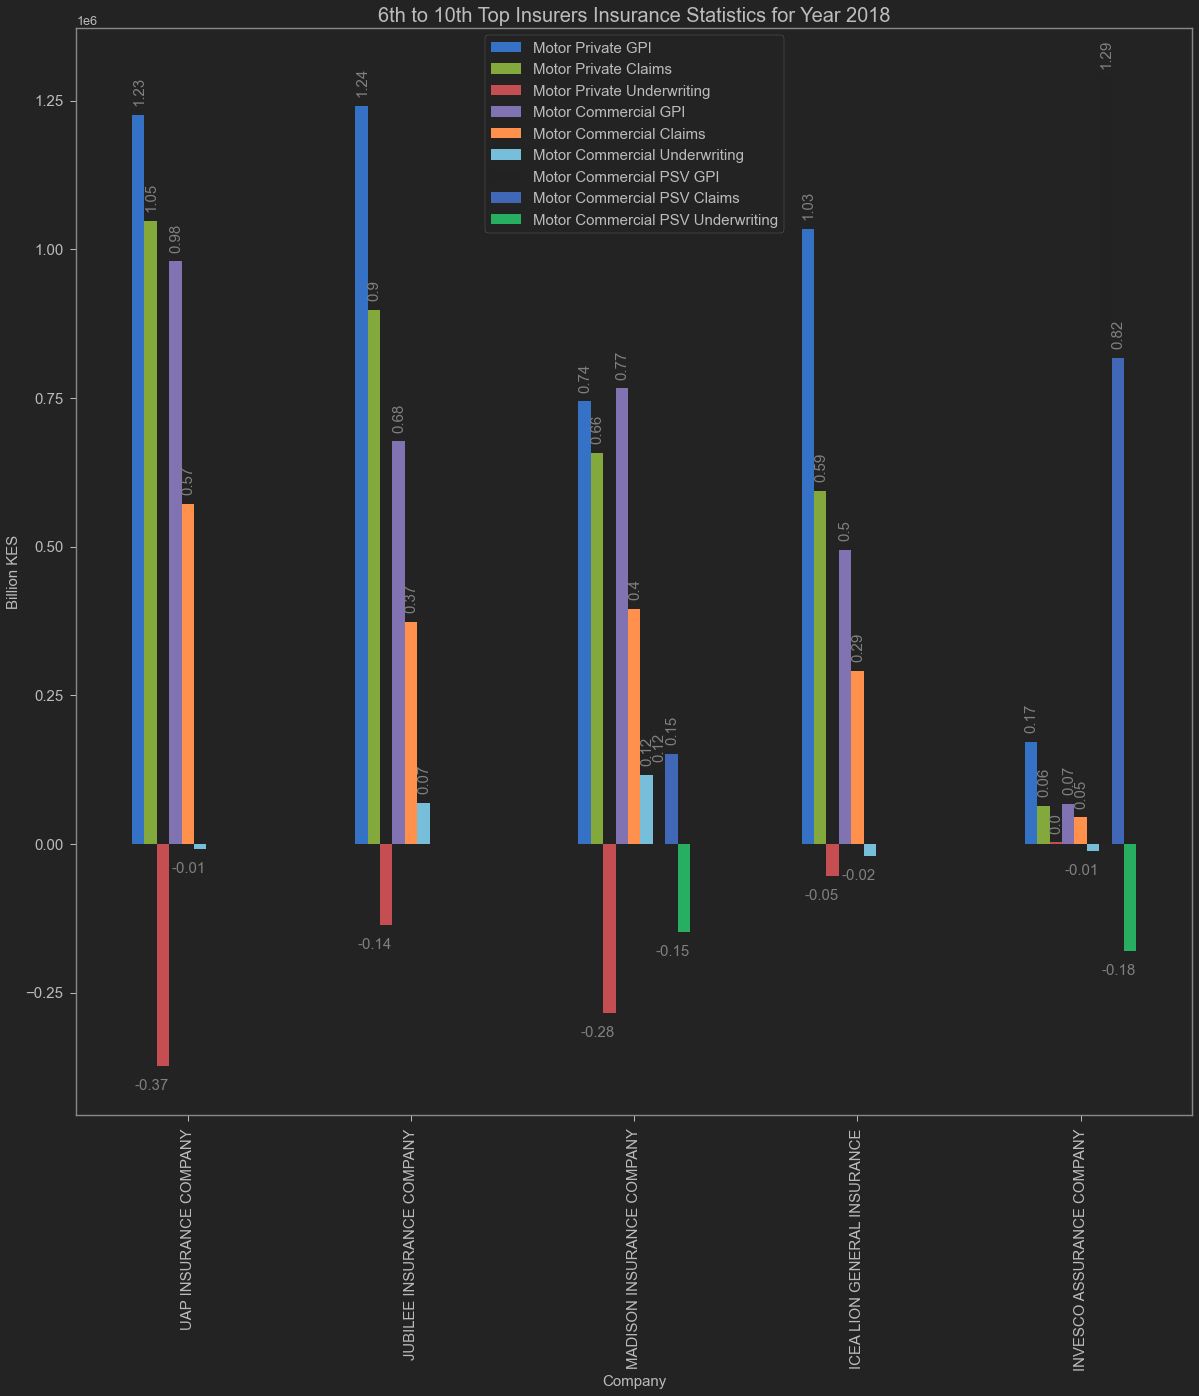

In [41]:
plot = df_sort_insurers_018[5:10].plot(kind='bar', x='Company', y=l, fontsize=15, figsize=(20,20), \
                                   title='6th to 10th Top Insurers Insurance Statistics for Year 2018')

plot.legend(loc='upper center', fontsize=15)
plot.set_xlabel('Company', fontsize=15)
plot.set_ylabel('Billion KES', fontsize=15)
plot.title.set_size(20)


for i in plot.patches:
    # get_width pulls left or right; get_y pushes up or down
    hght = i.get_height()
    if hght>0:
        plot.text(i.get_x(), i.get_height()+20000, round(i.get_height()/pow(10,6),2), fontsize=15, color='grey', rotation=90)
    elif hght<0:
        plot.text(i.get_x()-0.1, i.get_height()-40000, round(i.get_height()/pow(10,6),2), fontsize=15, color='grey')
        
plt.savefig('Easy Valuer Survey/6th to 10th Top Insurers Insurance Statistics for Year 2018.png', bbox_inches="tight")

<h1>Top Companies Analysis</h1>

In [70]:
df_sort_priv = df_8.sort_values(by=['Motor Private GPI'], ascending=False, ignore_index=True)
df_sort_commerc = df_8.sort_values(by=['Motor Commercial GPI'], ascending=False, ignore_index=True)
df_sort_psv = df_8.sort_values(by=['Motor Commercial PSV GPI'], ascending=False, ignore_index=True)
df_sort_total = df_8.sort_values(by=['Total GPI'], ascending=False, ignore_index=True)

counts_frame_2019 = pd.DataFrame(columns=['Company', 'Private', 'Commercial', 'PSV', 'Total'])

s1 = df_sort_priv.loc[:10, 'Company']
s2 = df_sort_commerc.loc[:10, 'Company']
s3 = df_sort_psv.loc[:10, 'Company']
s4 = df_sort_total.loc[:10, 'Company']

for i in s4:
    if i in s1.unique():
        if i in s2.unique():
            if i in s3.unique():
                counts_frame_2019 = counts_frame_2019.append({'Company': i, 'Private': 1, \
                                                              'Commercial': 2, 'PSV': 3, \
                                                                'Total': 1}, ignore_index=True)
            else:
                counts_frame_2019 = counts_frame_2019.append({'Company': i, 'Private': 1, \
                                                              'Commercial': 2, 'PSV': None, \
                                                    'Total': 1}, ignore_index=True)
        else:
            if i in s3.unique():
                counts_frame_2019 = counts_frame_2019.append({'Company': i, 'Private': 1, \
                                                              'Commercial': None, 'PSV': 3, \
                                                    'Total': 1}, ignore_index=True)
            else:
                counts_frame_2019 = counts_frame_2019.append({'Company': i, 'Private': 1, \
                                                              'Commercial': None, 'PSV': None, \
                                                    'Total': 1}, ignore_index=True)
    else:
        if i in s2.unique():
            if i in s3.unique():
                counts_frame_2019 = counts_frame_2019.append({'Company': i, 'Private': None, \
                                                              'Commercial': 2, 'PSV': 3, \
                                                    'Total': 1}, ignore_index=True)
            else:
                counts_frame_2019 = counts_frame_2019.append({'Company': i, 'Private': None, \
                                                              'Commercial': 2, 'PSV': None, \
                                                    'Total': 1}, ignore_index=True)
        else:
            if i in s3.unique():
                counts_frame_2019 = counts_frame_2019.append({'Company': i, 'Private': None, \
                                                              'Commercial': None, 'PSV': 3, \
                                                    'Total': 1}, ignore_index=True)
            else:
                counts_frame_2019 = counts_frame_2019.append({'Company': i, 'Private': None, \
                                                              'Commercial': None, 'PSV': None, \
                                                    'Total': 1}, ignore_index=True)
        

counts_frame_2019

,Company,Private,Commercial,PSV,Total
0,CIC GENERAL INSURANCE COMPANY,1,2,None,1
1,GEMINIA INSURANCE COMPANY,1,2,None,1
2,APA INSURANCE COMPANY,1,2,None,1
3,BRITAM GENERAL INSURANCE,1,2,None,1
4,DIRECTLINE ASSURANCE COMPANY,None,None,3,1
5,JUBILEE INSURANCE COMPANY,1,2,None,1
6,UAP INSURANCE COMPANY,1,2,None,1
7,ICEA LION GENERAL INSURANCE,1,None,None,1
8,HERITAGE INSURANCE COMPANY,1,2,3,1
9,OCCIDENTAL INSURANCE COMPANY,1,2,3,1


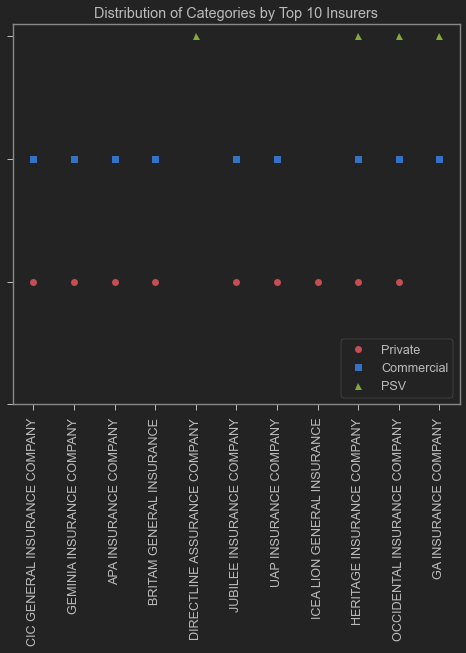

In [122]:
fig, ax = plt.subplots()
ax.plot(list(counts_frame_2019['Company']), list(counts_frame_2019['Private']), 'ro', label='Private')
ax.plot(list(counts_frame_2019['Company']), list(counts_frame_2019['Commercial']), 'bs', label='Commercial')
ax.plot( list(counts_frame_2019['Company']), list(counts_frame_2019['PSV']), 'g^', label='PSV')
plt.yticks([0,1,2,3], visible=False)
plt.xticks(rotation=90)
plt.legend(loc='lower right')
plt.title('Distribution of Categories by Top 10 Insurers')

plt.savefig('Easy Valuer Survey/Distribution of Categories by Top 10 Insurers for Year 2019.png', \
            bbox_inches="tight")

In [124]:
df_sort_priv = df_11.sort_values(by=['Motor Private GPI'], ascending=False, ignore_index=True)
df_sort_commerc = df_11.sort_values(by=['Motor Commercial GPI'], ascending=False, ignore_index=True)
df_sort_psv = df_11.sort_values(by=['Motor Commercial PSV GPI'], ascending=False, ignore_index=True)
df_sort_total = df_11.sort_values(by=['Total GPI'], ascending=False, ignore_index=True)

counts_frame_2018 = pd.DataFrame(columns=['Company', 'Private', 'Commercial', 'PSV', 'Total'])

s1 = df_sort_priv.loc[:10, 'Company']
s2 = df_sort_commerc.loc[:10, 'Company']
s3 = df_sort_psv.loc[:10, 'Company']
s4 = df_sort_total.loc[:10, 'Company']

for i in s4:
    if i in s1.unique():
        if i in s2.unique():
            if i in s3.unique():
                counts_frame_2018 = counts_frame_2018.append({'Company': i, 'Private': 1, \
                                                              'Commercial': 2, 'PSV': 3, \
                                                                'Total': 1}, ignore_index=True)
            else:
                counts_frame_2018 = counts_frame_2018.append({'Company': i, 'Private': 1, \
                                                              'Commercial': 2, 'PSV': None, \
                                                    'Total': 1}, ignore_index=True)
        else:
            if i in s3.unique():
                counts_frame_2018 = counts_frame_2018.append({'Company': i, 'Private': 1, \
                                                              'Commercial': None, 'PSV': 3, \
                                                    'Total': 1}, ignore_index=True)
            else:
                counts_frame_2018 = counts_frame_2018.append({'Company': i, 'Private': 1, \
                                                              'Commercial': None, 'PSV': None, \
                                                    'Total': 1}, ignore_index=True)
    else:
        if i in s2.unique():
            if i in s3.unique():
                counts_frame_2018 = counts_frame_2018.append({'Company': i, 'Private': None, \
                                                              'Commercial': 2, 'PSV': 3, \
                                                    'Total': 1}, ignore_index=True)
            else:
                counts_frame_2018 = counts_frame_2018.append({'Company': i, 'Private': None, \
                                                              'Commercial': 2, 'PSV': None, \
                                                    'Total': 1}, ignore_index=True)
        else:
            if i in s3.unique():
                counts_frame_2018 = counts_frame_2018.append({'Company': i, 'Private': None, \
                                                              'Commercial': None, 'PSV': 3, \
                                                    'Total': 1}, ignore_index=True)
            else:
                counts_frame_2018 = counts_frame_2018.append({'Company': i, 'Private': None, \
                                                              'Commercial': None, 'PSV': None, \
                                                    'Total': 1}, ignore_index=True)
        

counts_frame_2018

,Company,Private,Commercial,PSV,Total
0,CIC GENERAL INSURANCE COMPANY,1,2,None,1
1,DIRECTLINE ASSURANCE COMPANY,None,None,3,1
2,APA INSURANCE COMPANY,1,2,None,1
3,GEMINIA INSURANCE COMPANY,1,2,None,1
4,BRITAM GENERAL INSURANCE,1,2,None,1
5,UAP INSURANCE COMPANY,1,2,None,1
6,JUBILEE INSURANCE COMPANY,1,2,None,1
7,MADISON INSURANCE COMPANY,None,2,3,1
8,ICEA LION GENERAL INSURANCE,1,None,None,1
9,INVESCO ASSURANCE COMPANY,None,None,3,1


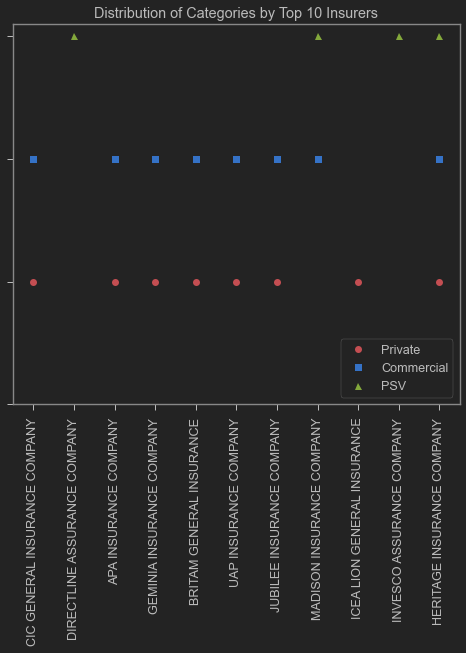

In [128]:
fig, ax = plt.subplots()
ax.plot(list(counts_frame_2018['Company']), list(counts_frame_2018['Private']), 'ro', label='Private')
ax.plot(list(counts_frame_2018['Company']), list(counts_frame_2018['Commercial']), 'bs', label='Commercial')
ax.plot( list(counts_frame_2018['Company']), list(counts_frame_2018['PSV']), 'g^', label='PSV')
plt.yticks([0,1,2,3], visible=False)
plt.xticks(rotation=90)
plt.legend(loc='lower right')
plt.title('Distribution of Categories by Top 10 Insurers')

plt.savefig('Easy Valuer Survey/Distribution of Categories by Top 10 Insurers for Year 2018.png', \
            bbox_inches="tight")